# Numerical Integration

### A first order method

Consider the general ODE

$$ \frac{dy}{dt} = f(t, y(t)) $$

Then take the taylor expansion of $y(t_0 + h)$, where $h$ is a small number and we are expanding around $t_0$.

$$ y(t_0 + h) = y(t_0) + hy'(t_0) + \frac{1}{2} h^2 y''(t_0) + \mathcal{O}(h^3) $$

Truncating term with $h^2$ or higher, we find

$$ y'(t_0) \approx \frac{y(t_0 + h) - y(t_0)}{h} $$

Which is an approximation of the first derivative and is eccurate to first order.

Substituting this in above, we can find that

$$ y(t_0 + h) \approx y(t_0) + h f(t_0, y(t_0)) $$

Which is Euler's method.

### A second order method

Consider a slight modification to the above procedure where we now take a "predictive" step to the point midway between the current time and the desired time $t + h/2$. To derive this method, consider:

$$ y(t_0 + h) = y(t_0) + hy'(t_0) + \frac{1}{2} h^2 y''(t_0) + \frac{1}{6}h^3y'''(t_0) + \mathcal{O}(h^4) $$

$$ y(t_0 - h) = y(t_0) - hy'(t_0) + \frac{1}{2} h^2 y''(t_0) - \frac{1}{6}h^3y'''(t_0) + \mathcal{O}(h^4) $$

Then consider

$$ y(t_0 + h) - y(t_0 - h) = 2hy'(t_0) + \frac{1}{3} h^3 y'''(t_0) + \mathcal{O}(h^4) $$

Which truncating terms of order $h^3$ and higher yields

$$ y'(t_0) \approx \frac{y(t_0 + h) - y(t_0 - h)}{2h} $$

Then WLOG, we can transform this central difference to avoid needing "negative time" by taking $t_0 -> t_0 + h$ and $h -> h/2$ which yields:

$$ y'(t_0 + h/2) \approx \frac{y(t_0 + h) - y(t_0)}{h}$$

Or:

$$ y(t_0 + h) \approx y(t_0) + hf(t_0 + h/2, y(t_0 + h/2)) $$

However, we cannot compute $f(t_0 + h/2, y(t_0 + h/2)$ directly, since we do not know $y(t_0 + h/2)$, but we can approximate this again by a taylor expansion which becomes simply an Euler step and find

$$y(t_0 + h/2) \approx y(t_0) + \frac{h}{2}hy'(t_0) \approx y(t_0) + \frac{h}{2}h f(t_0, y(t_0)) $$

So the overall method becomes

$$ y(t_0 + h) \approx y(t_0) + hf(t_0 + \frac{h}{2}, y(t_0) + \frac{h}{2}h f(t_0, y(t_0))) $$


## A simple integration

Consider the first order differential equation

$$ \frac{dy}{dt} = -5y $$

with $y(0) = 1$. We can easily solve this analytically to get $y(t) = e^{-5t}$. Lets also try solving this with euler.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def euler_step(f, y0, dt):
    return y0 + f(y0) * dt

def euler_integrate(N):
    t_arr = np.linspace(0, 1, N)
    dt = t_arr[1] - t_arr[0]
    y = np.zeros(len(t_arr))

    y[0] = 1.0

    for i in range(1, len(t_arr)):
        y[i] = euler_step(lambda y: -5*y, y[i-1], dt)
        
    return t_arr, y, dt

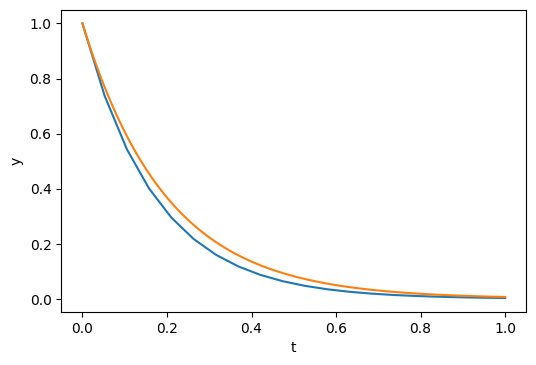

In [39]:
t_arr, y, _ = euler_integrate(20)

plt.figure(dpi=100)
plt.plot(t_arr, y)

t = np.linspace(0, 1, 100)
y = np.exp(-5 * t)
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

We can also see how the error scales with dt. To do this, run for many choices of $N$ and compute the error at $t=1$.

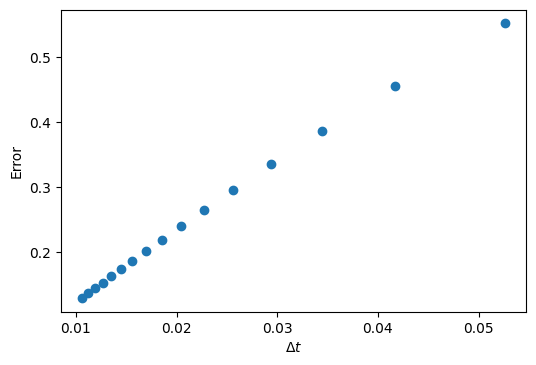

In [51]:
N_arr = np.arange(20, 100, 5)
dt_arr = np.zeros(len(N_arr))
err_arr = np.zeros(len(N_arr))

analytic = np.exp(-5)

for i in range(len(N_arr)):
    t, y, dt = euler_integrate(N_arr[i])
    dt_arr[i] = dt
    err_arr[i] = np.abs(y[-1] - analytic) / analytic

plt.figure(dpi=100)
plt.scatter(dt_arr, err_arr)
plt.xlabel("$\Delta t$")
plt.ylabel("Error")
plt.show()

### Exercise

Change the above to the 2nd order scheme we derived. Repeat the error analysis plot and determine that the 2nd order method is indeed 2nd order (hint: make a loglog plot instead).

## Using Scipy.Integrate

Though writing our own simple numerical integration schemes is not too difficult, for research we usually want to use a more complicatd scheme. Since problems involving ODEs are incredibly common and the schemes are incredibly general, scipy offers an array of integration tools to help you with these types of problems.

Here we will integrate the equations for the damped harmonic oscillator using the `dopri5` integrator from scipy, which is a modified RK4 scheme (with slightly better accuracy). We will compare the the (slightly less trivial) analytic solution.

The expression for the damped harmonic oscillator is:

$$ m \frac{d^2 x}{dt^2} + c \frac{dx}{dt} + kx = 0 $$

In order to integrate a 2nd order ODE numerically (or in general an n-th order ODE) we need to split it into 2 (in general n) first order ODEs.

### Exercise

Re-write the ODE as a set of coupled first order ODEs by using a dummy variable, $v$.

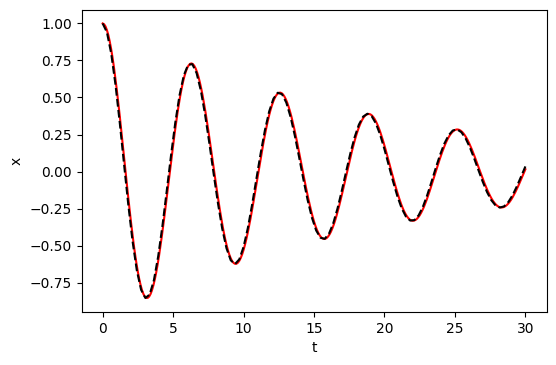

In [75]:
"""
Integrate the damped harmonic oscillator with Scipy
"""
from scipy.integrate import ode

def damped_oscillator(t, y, m, c, k):
    """
    Function for the damped harmonic oscillator.
    
    Parameters:
    t: Time
    y: Array of [x, v]
    m: mass
    c: damping coefficient
    k: spring constant
    """
    x, v = y
    
    return [v, -1/m * (c*v + k*x)]

# Set the initial conditions, lets do x=1, v=0
y0 = [1.0, 0.0]
t0 = 0.0

# Choose m, c, k
m = 1.0
c = 0.1
k = 1.0

# End time, timestep
t_end = 30
dt = 0.1

# Array to store the results
times = [t0]
res = [y0]

solver = ode(damped_oscillator).set_integrator('dopri5').set_initial_value(y0, t0).set_f_params(m, c, k)

# Solve the equation
while solver.successful() and solver.t < t_end:
    times.append(solver.t + dt)
    res.append(solver.integrate(solver.t + dt))
    
x, v = np.array(res).T
times = np.array(times)

# plot the results along with the analytic solution
plt.figure(dpi=100)
plt.plot(times, x, 'r')

t = np.linspace(0, 30, 100)
x = np.exp(-c/(2 * m) * t) * np.cos(np.sqrt(k/m) * t)

plt.plot(t, x, 'k--')
plt.xlabel("t")
plt.ylabel("x")

plt.show()

## The Hamiltonian of The Pendulum

For a slightly more involved example, consider the hamiltonian of the pendulum. We can integrate this in phase space and explore some of the properties of the integrators for energy conservation. We will here use the solve_ivp method in scipy to see another way to use scipy to integrate an ode.

First, the equations:

### The Hamiltonian pendulum
$$L = \frac{1}{2} m (l\dot\theta)^2 - mgl(1-\cos\theta)$$
$$p = \partial L/\partial \dot\theta = m l^2 \dot\theta$$
$$H = p\dot\theta - L = \frac{p^2}{2ml^2} - mgl\cos\theta$$
$$\frac{d\theta}{dt}= \frac{\partial H}{\partial p} = \frac{p}{ml^2}$$
$$\frac{d p}{dt} = -\frac{\partial H}{\partial \theta} = -mgl\sin\theta$$

Which gives us expression for $\frac{d \theta}{dt}$ and $\frac{dp}{dt}$

In [76]:
from scipy.integrate import solve_ivp

In [78]:
def pendulum(t, y, m, g, l):
    """
    Function the rhs of the ODES for dtheta/dt and dp/dt in the Hamiltonian
    of the pendulum.
    """
    theta, p = y
    
    return [p / (m * l**2), -m * g * l * np.sin(theta)]

In [79]:
def energy_theta_p(theta, p):
    """
    Energy of the pendulum given the coordinates theta and p.
    """
    kinetic_energy = 0.5 * p**2 / (m * l**2)
    potential_energy = -m * g * l * np.cos(theta)
    return(kinetic_energy, potential_energy, kinetic_energy + potential_energy)

def energy_y(y):
    """
    Wrapper function for the energy in terms of the vector y.
    """
    theta, p = y
    return energy_theta_p(theta, p)

def mod_2pi(theta):
    """
    Make sure theta is always within (0, 2*pi).
    """
    theta = np.mod(theta, 2.*np.pi)
    theta = np.where(theta > np.pi, theta - 2.*np.pi, theta)
    theta = np.where(theta < - np.pi, theta + 2.*np.pi, theta)
    return(theta)

The separatrix is the boundary between the two types of motion: oscilating back and forward and moving in continuous circles. We can find this by finding the energy where the $p = 0$ at $\theta = \pi$, ie:

$$ H = H(\pi, 0) = E_{sep} = mgl $$

Then the maximum $p$ along the sparatrix is given by $E_{sep} = \frac{p^2}{ml^2} + mgl$ which means:

$$p_{sep} = \pm\sqrt{4ml^2E_{sep}}$$

In [85]:
# Setup the parameters
m = 100. # grams
l = 10. # cm
g = 980. # cm/s^2

E_sep = m * g * l
p_sep = np.sqrt(4 * m * l**2 * E_sep)

In [107]:
# Numer of periods to integrate for
num_periods = 50

# The period of small oscillations
period = 2. * np.pi * np.sqrt(l/g)
print("The period of small oscillations is {:.2e} s".format(period))

# Tmax for the integration
t_max = num_periods * period

# Choose three interesting initial conditions
y_sep = [ np.pi , 0.] # Very near the separatrix
y_fp = [0.1 * np.pi , 0. ] # Near the stable fixed point
y_rotate = [0., 1.01 * p_sep] # Rotating, E just above E_separatrix
y_rotate_m = [0., -1.01 * p_sep] # Rotating, E just below E_separatrix

The period of small oscillations is 6.35e-01 s


In [113]:
# Solve the ode for each of the initial conditions.

# Error tolerances absolute for each param and relative
atol = [3.e-12, 3.e-12]
rtol = 3.e-12

# Times to evaluate the solution at
t_eval = np.linspace(0, t_max, 5000)

t_span = [0, t_max]

def solve_pendulum_ivp(y0):
    return solve_ivp(
        fun=lambda t, y: pendulum(t, y, m, g, l),
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        atol=atol,
        rtol=rtol
    )


sol_theta_sep, sol_p_sep = solve_pendulum_ivp(y_sep).y
sol_theta_fp, sol_p_fp = solve_pendulum_ivp(y_fp).y
sol_theta_rotate, sol_p_rotate = solve_pendulum_ivp(y_rotate).y
sol_theta_rotate_m, sol_p_rotate_m = solve_pendulum_ivp(y_rotate_m).y

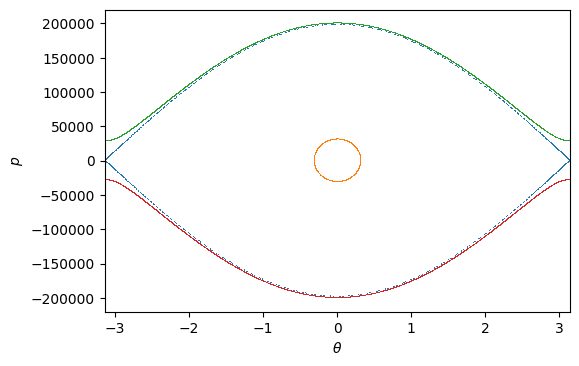

In [117]:
plt.figure(dpi=100)
plt.plot(mod_2pi(sol_theta_sep), sol_p_sep, ',')
plt.plot(mod_2pi(sol_theta_fp), sol_p_fp, ',')
plt.plot(mod_2pi(sol_theta_rotate), sol_p_rotate, ',')
plt.plot(mod_2pi(sol_theta_rotate_m), sol_p_rotate_m, ',')
plt.xlim(-np.pi, np.pi)
plt.xlabel(r"$\theta$")
plt.ylabel("$p$")
plt.show()

### Exercise

Use the energy functions, the results from the integration along the spearatrix and the intial condition on the separatrix to compute and plot the energy error as a function of time.